### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
forest=pd.read_csv('forestfires.csv')
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


### Data Understanding

In [3]:
forest.shape

(517, 31)

In [4]:
forest.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
forest.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [6]:
forest[forest.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


### Data Visualization

#### Categorical - Label

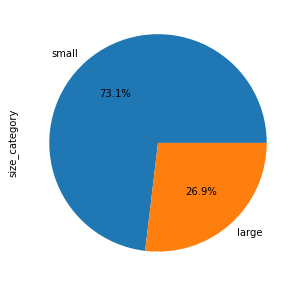

In [7]:
plt.figure(figsize=(5,5))
forest.size_category.value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()

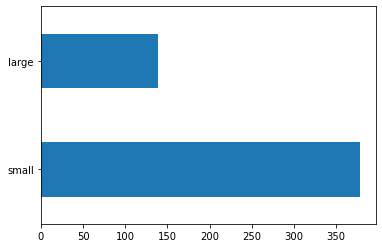

In [8]:
forest.size_category.value_counts().plot(kind='barh')
plt.show()

#### Features Month Vs Day

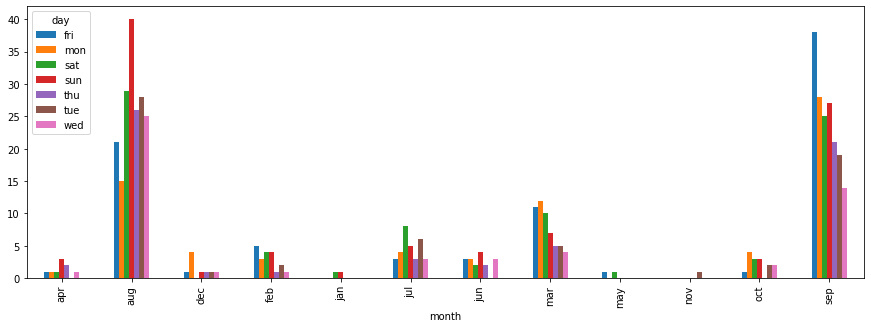

In [9]:
pd.crosstab(forest.month,forest.day).plot(kind='bar',figsize=(15,5))
plt.show()

In [10]:
col_index = pd.DataFrame(columns=['Index','Columns'])
for x in forest.columns:
    col_index=col_index.append({'Index':forest.columns.get_loc(x),'Columns':x},ignore_index=True)
col_index=col_index.set_index('Index')
col_index

,Columns
Index,
0,month
1,day
2,FFMC
3,DMC
4,DC
5,ISI
6,temp
7,RH
8,wind


#### Continuous Features - Visualizations

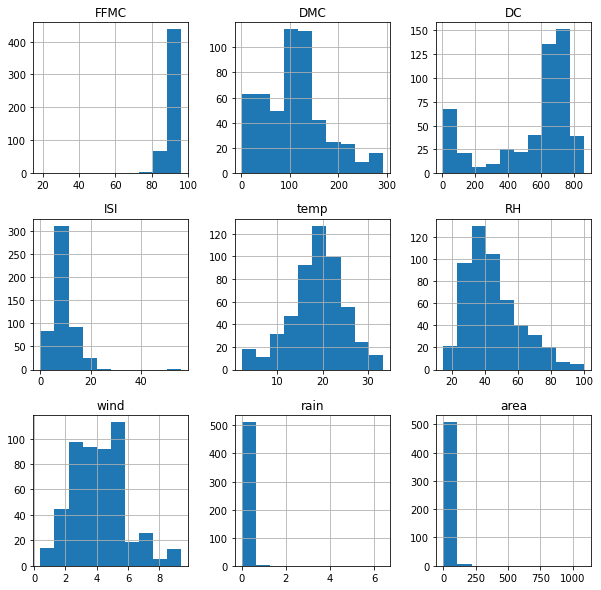

In [11]:
forest.iloc[:,2:11].hist(figsize=(10,10))
plt.show()

FFMC


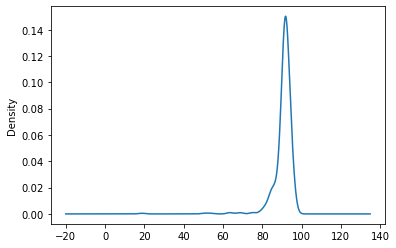

DMC


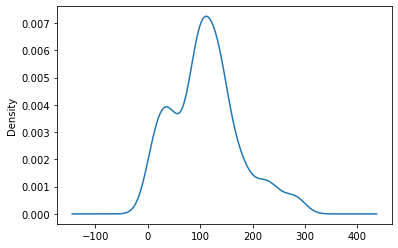

DC


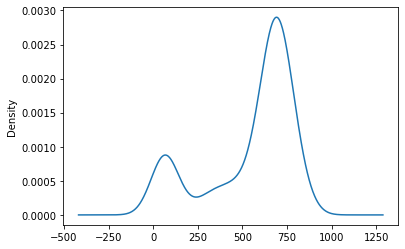

ISI


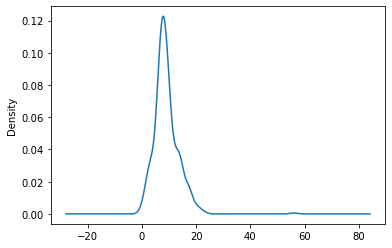

temp


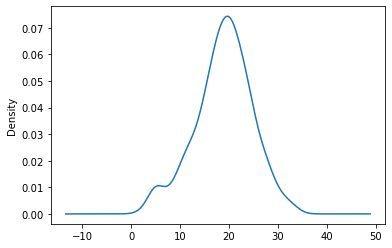

RH


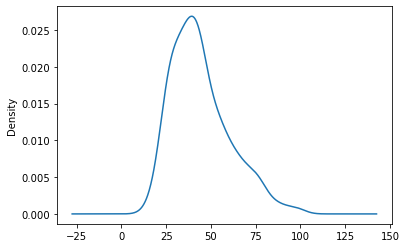

wind


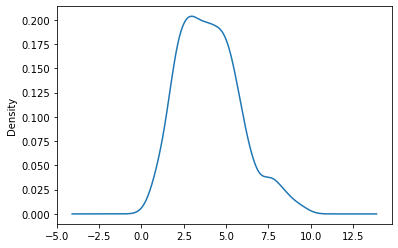

rain


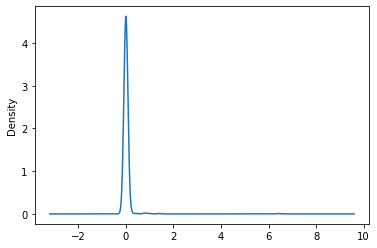

area


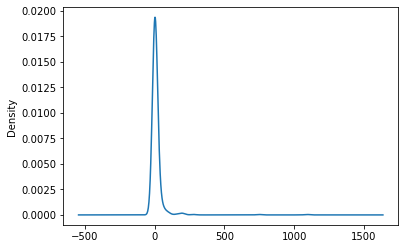

In [12]:
for i in forest.iloc[:,2:11].columns:
    print(i)
    forest.iloc[:,2:11][i].plot(kind='kde')
    plt.show()

### Data Cleaning || Data Preparation

In [13]:
forest=forest.drop(['month','day'],axis=1)

In [14]:
forest.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [15]:
forest=forest.drop_duplicates().reset_index(drop=True)
forest

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [16]:
le=LabelEncoder()
forest['size_category']=le.fit_transform(forest['size_category'])
forest.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [17]:
#Correlation Metrics
corr=forest.corr().round(2)
np.fill_diagonal(corr.values,0)
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,0.00,0.38,0.33,0.53,0.43,-0.31,-0.03,0.05,0.04,0.02,...,-0.28,-0.46,0.03,-0.04,-0.07,-0.04,-0.09,-0.01,0.08,-0.02
DMC,0.38,0.00,0.68,0.31,0.47,0.06,-0.10,0.07,0.08,-0.01,...,-0.32,-0.11,0.00,-0.05,-0.40,-0.08,-0.07,-0.19,0.12,-0.05
DC,0.33,0.68,0.00,0.23,0.50,-0.05,-0.20,0.03,0.05,-0.00,...,-0.40,-0.12,-0.10,-0.18,-0.65,-0.12,-0.08,0.09,0.54,-0.03
ISI,0.53,0.31,0.23,0.00,0.40,-0.14,0.10,0.06,0.01,0.05,...,-0.25,-0.10,0.02,0.12,-0.14,-0.06,-0.08,-0.07,-0.07,0.01
temp,0.43,0.47,0.50,0.40,0.00,-0.53,-0.23,0.07,0.10,-0.08,...,-0.32,-0.15,0.14,0.05,-0.34,-0.05,-0.05,-0.05,0.09,-0.01
RH,-0.31,0.06,-0.05,-0.14,-0.53,0.00,0.07,0.09,-0.07,0.07,...,0.14,0.17,0.01,0.01,-0.08,0.09,-0.04,-0.07,-0.06,0.04
wind,-0.03,-0.10,-0.20,0.10,-0.23,0.07,0.00,0.06,0.01,0.12,...,-0.03,-0.07,-0.04,0.01,0.18,0.02,0.01,-0.05,-0.18,-0.06
rain,0.05,0.07,0.03,0.06,0.07,0.09,0.06,0.00,-0.01,-0.00,...,-0.01,-0.00,-0.01,-0.01,-0.02,-0.00,-0.00,-0.01,-0.05,-0.05
area,0.04,0.08,0.05,0.01,0.10,-0.07,0.01,-0.01,0.00,-0.05,...,-0.02,-0.01,0.01,-0.02,-0.05,0.01,-0.01,-0.02,0.06,-0.31
dayfri,0.02,-0.01,-0.00,0.05,-0.08,0.07,0.12,-0.00,-0.05,0.00,...,0.05,-0.03,-0.05,-0.02,0.04,0.06,-0.02,-0.05,0.11,0.02


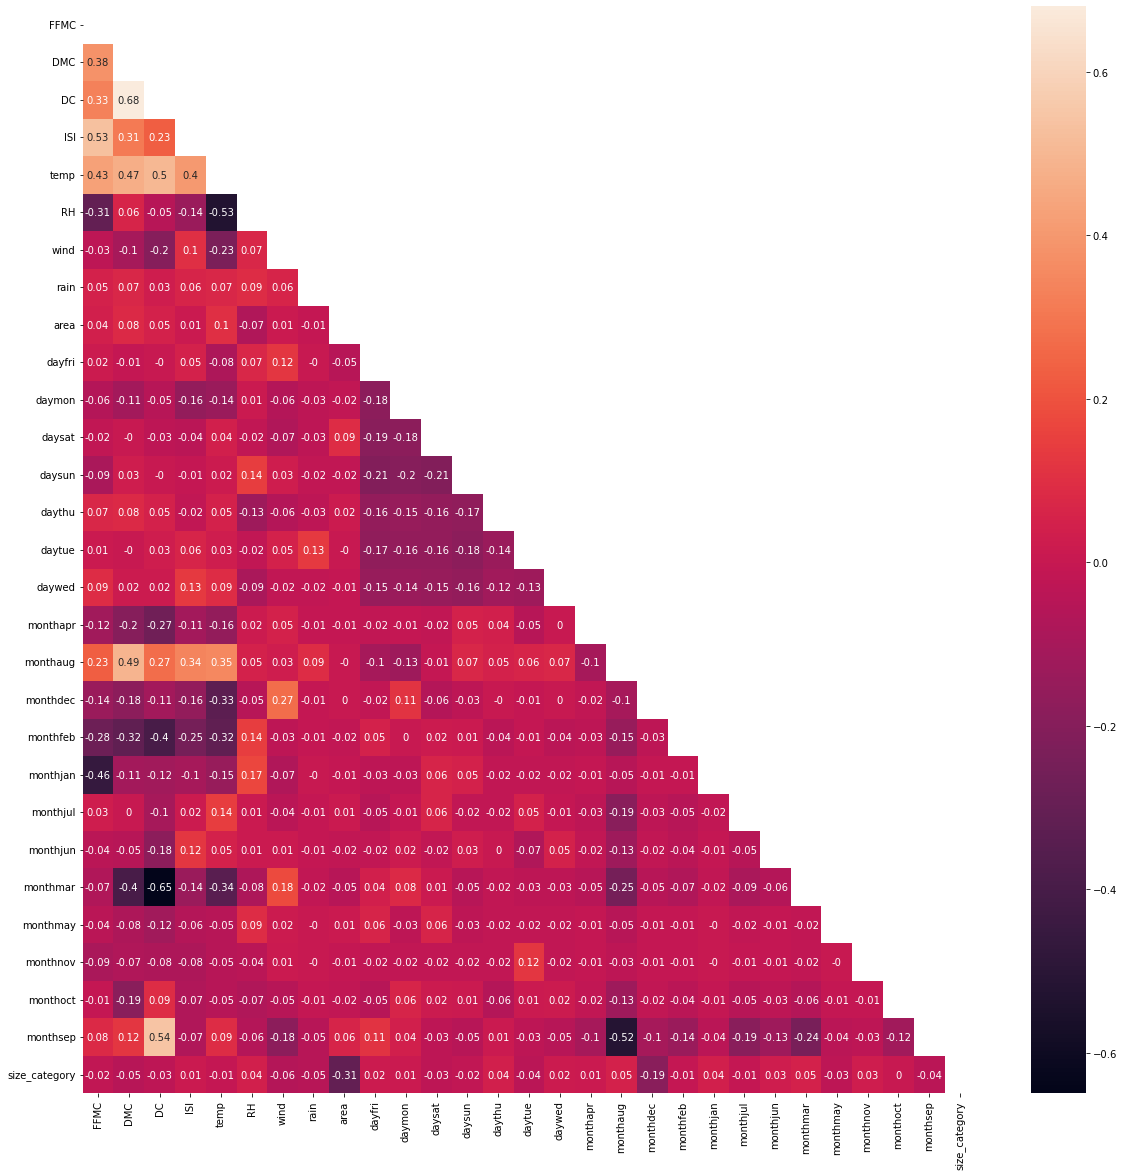

In [18]:
plt.figure(figsize=(20,20))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,mask=mask)
plt.show()

#### There is no multi collinearity in the dataset

### Data Preparation

In [19]:
scaled_forest = forest.copy()
col_names=['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
features=scaled_forest[col_names]
ss=StandardScaler()
features=ss.fit_transform(features)
scaled_forest[col_names]=features
scaled_forest

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,-0.202791,1,...,0,0,0,0,1,0,0,0,0,1
1,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,-0.202791,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,-0.202791,0,...,0,0,0,0,0,0,0,1,0,1
3,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,-0.202791,1,...,0,0,0,0,1,0,0,0,0,1
4,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,-0.202791,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,-1.624859,-0.839890,0.475141,-1.555170,1.531115,-0.749487,-0.728894,-0.069035,-0.102277,0,...,0,0,0,0,0,0,0,0,0,0
505,-1.624859,-0.839890,0.475141,-1.555170,0.520034,1.635965,0.994136,-0.069035,0.644559,0,...,0,0,0,0,0,0,0,0,0,0
506,-1.624859,-0.839890,0.475141,-1.555170,0.400076,1.574799,1.494370,-0.069035,-0.028608,0,...,0,0,0,0,0,0,0,0,0,0
507,0.681420,0.561083,0.269860,0.496973,1.154102,-0.137832,-0.006333,-0.069035,-0.202791,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
X=scaled_forest.drop('size_category',axis=1)
y=scaled_forest[['size_category']]
X.shape,y.shape

((509, 28), (509, 1))

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12,stratify=forest['size_category'])

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((356, 28), (153, 28), (356, 1), (153, 1))

### Model Training || Model Testing || Model Evaluation

#### 1. Linear Model

In [23]:
svc_linear=SVC(kernel='linear',decision_function_shape ='ovo')
svc_linear.fit(X_train,y_train)

SVC(decision_function_shape='ovo', kernel='linear')

In [24]:
y_pred_linear_train=svc_linear.predict(X_train)
y_pred_linear_test=svc_linear.predict(X_test)

In [25]:
confusion_matrix(y_train,y_pred_linear_train)

array([[ 62,  35],
       [  0, 259]], dtype=int64)

In [26]:
confusion_matrix(y_test,y_pred_linear_test)

array([[ 23,  18],
       [  1, 111]], dtype=int64)

In [27]:
print(classification_report(y_train,y_pred_linear_train))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        97
           1       0.88      1.00      0.94       259

    accuracy                           0.90       356
   macro avg       0.94      0.82      0.86       356
weighted avg       0.91      0.90      0.89       356



In [28]:
print(classification_report(y_test,y_pred_linear_test))

              precision    recall  f1-score   support

           0       0.96      0.56      0.71        41
           1       0.86      0.99      0.92       112

    accuracy                           0.88       153
   macro avg       0.91      0.78      0.81       153
weighted avg       0.89      0.88      0.86       153



In [29]:
train_acc_linear=accuracy_score(y_train,y_pred_linear_train)
train_acc_linear

0.901685393258427

In [30]:
test_acc_linear=accuracy_score(y_test,y_pred_linear_test)
test_acc_linear

0.8758169934640523

#### 2. rbf Model

In [31]:
svc_rbf=SVC(kernel='rbf',decision_function_shape ='ovo')
svc_rbf.fit(X_train,y_train)

SVC(decision_function_shape='ovo')

In [32]:
y_pred_rbf_train=svc_rbf.predict(X_train)
y_pred_rbf_test=svc_rbf.predict(X_test)

In [33]:
confusion_matrix(y_train,y_pred_rbf_train)

array([[ 29,  68],
       [  0, 259]], dtype=int64)

In [34]:
confusion_matrix(y_test,y_pred_rbf_test)

array([[  8,  33],
       [  0, 112]], dtype=int64)

In [35]:
print(classification_report(y_train,y_pred_rbf_train))

              precision    recall  f1-score   support

           0       1.00      0.30      0.46        97
           1       0.79      1.00      0.88       259

    accuracy                           0.81       356
   macro avg       0.90      0.65      0.67       356
weighted avg       0.85      0.81      0.77       356



In [36]:
print(classification_report(y_test,y_pred_rbf_test))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33        41
           1       0.77      1.00      0.87       112

    accuracy                           0.78       153
   macro avg       0.89      0.60      0.60       153
weighted avg       0.83      0.78      0.73       153



In [37]:
train_acc_rbf=accuracy_score(y_train,y_pred_rbf_train)
train_acc_rbf

0.8089887640449438

In [38]:
test_acc_rbf=accuracy_score(y_test,y_pred_rbf_test)
test_acc_rbf

0.7843137254901961

#### 3. poly Model

In [39]:
svc_poly=SVC(kernel='poly',decision_function_shape ='ovo')
svc_poly.fit(X_train,y_train)

SVC(decision_function_shape='ovo', kernel='poly')

In [40]:
y_pred_poly_train=svc_poly.predict(X_train)
y_pred_poly_test=svc_poly.predict(X_test)

In [41]:
confusion_matrix(y_train,y_pred_poly_train)

array([[ 35,  62],
       [  1, 258]], dtype=int64)

In [42]:
confusion_matrix(y_test,y_pred_poly_test)

array([[  5,  36],
       [  2, 110]], dtype=int64)

In [43]:
print(classification_report(y_train,y_pred_poly_train))

              precision    recall  f1-score   support

           0       0.97      0.36      0.53        97
           1       0.81      1.00      0.89       259

    accuracy                           0.82       356
   macro avg       0.89      0.68      0.71       356
weighted avg       0.85      0.82      0.79       356



In [44]:
print(classification_report(y_test,y_pred_poly_test))

              precision    recall  f1-score   support

           0       0.71      0.12      0.21        41
           1       0.75      0.98      0.85       112

    accuracy                           0.75       153
   macro avg       0.73      0.55      0.53       153
weighted avg       0.74      0.75      0.68       153



In [45]:
train_acc_poly=accuracy_score(y_train,y_pred_poly_train)
train_acc_poly

0.8230337078651685

In [46]:
test_acc_poly=accuracy_score(y_test,y_pred_poly_test)
test_acc_poly

0.7516339869281046

#### 4. sigmoid Model

In [47]:
svc_sigmoid=SVC(kernel='sigmoid',decision_function_shape ='ovo')
svc_sigmoid.fit(X_train,y_train)

SVC(decision_function_shape='ovo', kernel='sigmoid')

In [48]:
y_pred_sigmoid_train=svc_sigmoid.predict(X_train)
y_pred_sigmoid_test=svc_sigmoid.predict(X_test)

In [49]:
confusion_matrix(y_train,y_pred_sigmoid_train)

array([[ 27,  70],
       [ 15, 244]], dtype=int64)

In [50]:
confusion_matrix(y_test,y_pred_sigmoid_test)

array([[ 11,  30],
       [  7, 105]], dtype=int64)

In [51]:
print(classification_report(y_train,y_pred_sigmoid_train))

              precision    recall  f1-score   support

           0       0.64      0.28      0.39        97
           1       0.78      0.94      0.85       259

    accuracy                           0.76       356
   macro avg       0.71      0.61      0.62       356
weighted avg       0.74      0.76      0.73       356



In [52]:
print(classification_report(y_test,y_pred_sigmoid_test))

              precision    recall  f1-score   support

           0       0.61      0.27      0.37        41
           1       0.78      0.94      0.85       112

    accuracy                           0.76       153
   macro avg       0.69      0.60      0.61       153
weighted avg       0.73      0.76      0.72       153



In [53]:
train_acc_sigmoid=accuracy_score(y_train,y_pred_sigmoid_train)
train_acc_sigmoid

0.7612359550561798

In [54]:
test_acc_sigmoid=accuracy_score(y_test,y_pred_sigmoid_test)
test_acc_sigmoid

0.7581699346405228

### Consolidated Evaluation

In [55]:
consolidated = pd.DataFrame()
consolidated['Models - Kernals']=pd.Series(['Linear','Rbf','Poly','Sigmoid'])
consolidated['Training Accuracy']=pd.Series([train_acc_linear,train_acc_rbf,train_acc_poly,train_acc_sigmoid])
consolidated['Testing Accuracy']=pd.Series([test_acc_linear,test_acc_rbf,test_acc_poly,test_acc_sigmoid])
consolidated

,Models - Kernals,Training Accuracy,Testing Accuracy
0,Linear,0.901685,0.875817
1,Rbf,0.808989,0.784314
2,Poly,0.823034,0.751634
3,Sigmoid,0.761236,0.758170


#### We can observe from above table that, Linear model has More Training Accuracy and Testing Accuracy

### End !!!